## 网格搜索

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.9888888888888889

### Grid Search


In [5]:
# 定义需要搜索的参数的集合
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors': [i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [6]:
knn_clf = KNeighborsClassifier()

In [7]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [9]:
%%time
grid_search.fit(X_train,y_train)

C:\Users\Ruojun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 53 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=3,
                     weights='distance')

In [ ]:
# cv: cross validation

In [11]:
grid_search.best_score_

0.9853862212943633

In [12]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [13]:
knn_clf = grid_search.best_estimator_

In [14]:
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 5, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [15]:
knn_clf.score(X_test,y_test)

0.9833333333333333

In [17]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)  #=-1全部核
grid_search.fit(X_train,y_train)

C:\Users\Ruojun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.0s


Wall time: 11.1 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.0s finished


### 更多的距离定义
* 向量空间余弦相似度 Cosine Similarity
* 调整余弦相似度 Adjusted Cosine Similarity
* 皮尔森相关系数 Pearson Correlation Coefficient
* Jaccard相似系数 Jaccard Coefficient

## 数据归一化 Feature Scaling
* 解决方案：将所有的数据映射到同一尺度
* 最值归一化Normalization：把所有数据映射到0-1之间  
X scale = (X - Xmin)  / (Xmax - Xmin)  
适用于分布有明显边界的情况(考试分数，图像像素)；受outlier影响比较大(e.g.收入)
* 均值方差归一化Standardization: 把所有数据归一到均值为0方差为1的分布中  
数据分布没有明显的边界；有可能存在极端数据值  
X scale = (X - Xmean) / S

## 数据归一化处理

In [29]:
import numpy as np
import matplotlib.pyplot as plt

### 最值归一化 Normalization

In [18]:
x = np.random.randint(0,100,size = 100)

In [19]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.1875    , 0.72916667, 0.79166667, 0.        , 0.23958333,
       0.77083333, 0.47916667, 0.55208333, 0.66666667, 0.95833333,
       0.77083333, 0.23958333, 0.14583333, 0.11458333, 0.05208333,
       0.01041667, 0.09375   , 0.1875    , 0.20833333, 0.42708333,
       0.66666667, 0.57291667, 0.5       , 0.30208333, 0.03125   ,
       0.10416667, 0.42708333, 0.48958333, 0.08333333, 0.01041667,
       0.14583333, 0.9375    , 0.46875   , 0.63541667, 0.5625    ,
       0.28125   , 0.23958333, 0.78125   , 0.41666667, 0.21875   ,
       0.71875   , 0.19791667, 0.79166667, 0.125     , 0.15625   ,
       0.89583333, 0.875     , 0.22916667, 0.66666667, 0.125     ,
       0.26041667, 0.02083333, 0.28125   , 0.29166667, 0.64583333,
       0.41666667, 0.82291667, 1.        , 0.84375   , 0.25      ,
       0.55208333, 0.48958333, 0.92708333, 0.78125   , 0.95833333,
       0.71875   , 1.        , 0.22916667, 0.89583333, 0.11458333,
       0.61458333, 0.20833333, 0.9375    , 0.35416667, 0.55208

In [21]:
X = np.random.randint(0,100,(50,2))

In [22]:
X[:10,:]

array([[48, 38],
       [69,  4],
       [72, 52],
       [59, 95],
       [76, 89],
       [95, 74],
       [19, 14],
       [69, 67],
       [77,  6],
       [55, 63]])

In [23]:
X = np.array(X, dtype =float)

In [24]:
X[:10,:]

array([[48., 38.],
       [69.,  4.],
       [72., 52.],
       [59., 95.],
       [76., 89.],
       [95., 74.],
       [19., 14.],
       [69., 67.],
       [77.,  6.],
       [55., 63.]])

In [25]:
# 对每一个维度处理
X[:,0] = (X[:,0]-np.min(X[:,0])) / (np.max(X[:,0])-np.min(X[:,0]))

In [26]:
X[:,1] = (X[:,1]-np.min(X[:,1])) / (np.max(X[:,1])-np.min(X[:,1]))

In [27]:
X[:10,:]

array([[0.5       , 0.38709677],
       [0.72340426, 0.02150538],
       [0.75531915, 0.53763441],
       [0.61702128, 1.        ],
       [0.79787234, 0.93548387],
       [1.        , 0.77419355],
       [0.19148936, 0.12903226],
       [0.72340426, 0.69892473],
       [0.80851064, 0.04301075],
       [0.57446809, 0.65591398]])

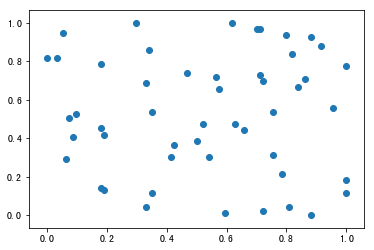

In [30]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [36]:
np.mean(X[:,0])

0.5295744680851064

In [37]:
np.std(X[:,0])

0.2996020447897361

## 均值方差归一化 Standardization

In [39]:
X2 = np.random.randint(0,100,(50,2))

In [40]:
X2 = np.array(X2, dtype=float)

In [41]:
X2[:,0] = (X2[:,0]-np.mean(X2[:,0])) / np.std(X2[:,0])

In [42]:
X2[:,1] = (X2[:,1]-np.mean(X2[:,1])) / np.std(X2[:,1])

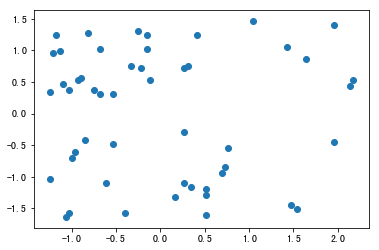

In [43]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

<img src = '5.png' height=400 width=400>
<img src = '6.png' height=400 width=400>

测试数据是模拟真实环境  
* 真实环境很有可能无法得到所有测试数据的均值和方差
* 对数据进行归一化也是算法的一部分
* 要保存训练数据集得到的均值和方差 scikit-learn中使用Scaler

<img src = '7.png' height=400 width=400>

### Scikit-learn中的Scaler

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state =666)

### scikit-learn中的StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
standardScaler = StandardScaler()

In [8]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
standardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [11]:
standardScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [13]:
X_train = standardScaler.transform(X_train) # 对X_train进行归一化

In [14]:
X_test_standard =  standardScaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [19]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
knn_clf.score(X_test_standard,y_test)  #传近标准化以后的test

1.0

In [ ]:
#进行封装
import numpy as np
class StandardScaler:
    def __init__(self):
        self.mean_ = None    #名称_ 这样的命名方式是可供用户以后查询的
        self.scale_ = None
    def fit(self,X):
        """根据训练数据集X获得数据的均值和方差"""
        
        assert X.ndim ==2, "The dimension of X must be 2"
        self.mean_ = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
        self.scale_ = np.array([np.std(X[:,i]) for i in range(X.shape[1])])
        
        return self
    
    def transform(self, X):
        """将X根据这个StandardScaler进行均值方差归一化处理"""
        assert X.ndim ==2 , "The dimension of X must be 2"
        assert self.mean_ is not None and self.scale_ is not None, \
            "must fit before transform!"
        assert X.shape[1] == len(self.mean_), \
            "the feature number of X must be equal to mean_ and scale_"
        resX = np.empty(shape=X.shape,stype=float)
        for col in range(X.shape[1]):
            resX[:,col] = (X[:,col] - self.mean_[col]) / self.scale_[col]
        return resX

# 总结
* 解决分类问题
* 天然可以解决多分类问题
* 思想简单，效果强大

<img src = '8.png' height=400 width=400>
KNeighborsRegressor
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html


* 最大的缺点：效率低下
如果训练集有m个样本，n个特征，则预测每一个新的数据需要O(m*n)
优化，使用树结构：KD-Tree，Ball-Tree
* 缺点2：高度数据相关
* 缺点3：预测结果不具有可解释性
* 缺点4：维数灾难  
随着维度的增加，“看似相近的两个点之间的距离越来越大”
<img src = '9.png' height=400 width=400>
<img src = '10.png' height=400 width=400>